1.Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).

ω1 = [1,6; 3,4; 3,8; 5,6]

ω2 = [3,0; 1,-2;3,-4;5,-2]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Function to check whether the data falls under case 1
def isCase1(mat):
    first = mat[0][0]
    for i in range(1, len(mat)):
        if mat[i][i] != first:
            return False
    return True


#If the data falls under case-1 discriminant function is computed accordingly.
def linear_case1(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)
    cov = cov_mat[0][0]
    weight = u1 / cov
    bias = np.log(pw) - 0.5 * np.dot(u1.T, u1) / (cov ** 2)
    return weight, bias

#If the data falls under case-2 discriminant function is computed accordingly.
def linear_case2(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)
    inv_cov = np.linalg.inv(cov_mat)
    weight = inv_cov @ u1
    bias = np.log(pw) - 0.5 * u1.T @ inv_cov @ u1
    return weight, bias

#If the data falls under case-3 discriminant function is computed accordingly.
def non_linear(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)
    inv_cov = np.linalg.inv(cov_mat)
    weight1 = -0.5 * inv_cov
    weight2 = inv_cov @ u1
    bias = np.log(pw) - 0.5 * np.log(np.linalg.det(cov_mat)) - 0.5 * u1.T @ inv_cov @ u1
    return weight1, weight2, bias


#wieghts and biases are extracted from above functions by checking the cases for the given data.
def bayes_classifier(w1, w2, pw1, pw2):
    #Covarinaces are computed to find the particular case from Baye's classifier
    w1_cov = np.cov(w1, rowvar=False)
    w2_cov = np.cov(w2, rowvar=False)
    
    if np.allclose(w1_cov, w2_cov):  
        #print("Case-2 for Bayes classifier...\n")
        weight1, bias1 = linear_case2(w1, pw1, w1_cov)
        weight2, bias2 = linear_case2(w2, pw2, w2_cov)

        w = weight1 - weight2
        b = bias1 - bias2

        #For setting the decision boundary limits.
        x_min = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1
        x_max = max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1
        
        x_values = np.linspace(x_min, x_max, 100)
        y_values = -(w[0] * x_values + b) / w[1]
    
    elif isCase1(w1_cov) and isCase1(w2_cov):  
        #print("Case-1 for Bayes classifier...\n")
        weight1, bias1 = linear_case1(w1, pw1, w1_cov)
        weight2, bias2 = linear_case1(w2, pw2, w2_cov)

        w = weight1 - weight2
        b = bias1 - bias2
        #For setting the decision boundary limits.
        x_min = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1
        x_max = max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1

        x_values = np.linspace(x_min, x_max, 100)
        y_values = -(w[0] * x_values + b) / w[1]
    
    else:  
        #print("Case-3 for Bayes classifier...\n")
        weight1_1, weight1_2, bias1 = non_linear(w1, pw1, w1_cov)
        weight2_1, weight2_2, bias2 = non_linear(w2, pw2, w2_cov)

        
        x_min, x_max = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1, max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1
        y_min, y_max = min(np.min(w1[:, 1]), np.min(w2[:, 1])) - 1, max(np.max(w1[:, 1]), np.max(w2[:, 1])) + 1
        
        #As it is non-linear we use meshgrid here
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        
        
        g1_values = np.array([point.T @ weight1_1 @ point + weight1_2.T @ point + bias1 for point in grid_points])
        g2_values = np.array([point.T @ weight2_1 @ point + weight2_2.T @ point + bias2 for point in grid_points])
        
        g1_values = g1_values.reshape(xx.shape)
        g2_values = g2_values.reshape(xx.shape)
        
        return xx, yy, g1_values, g2_values
    
    return x_values, y_values




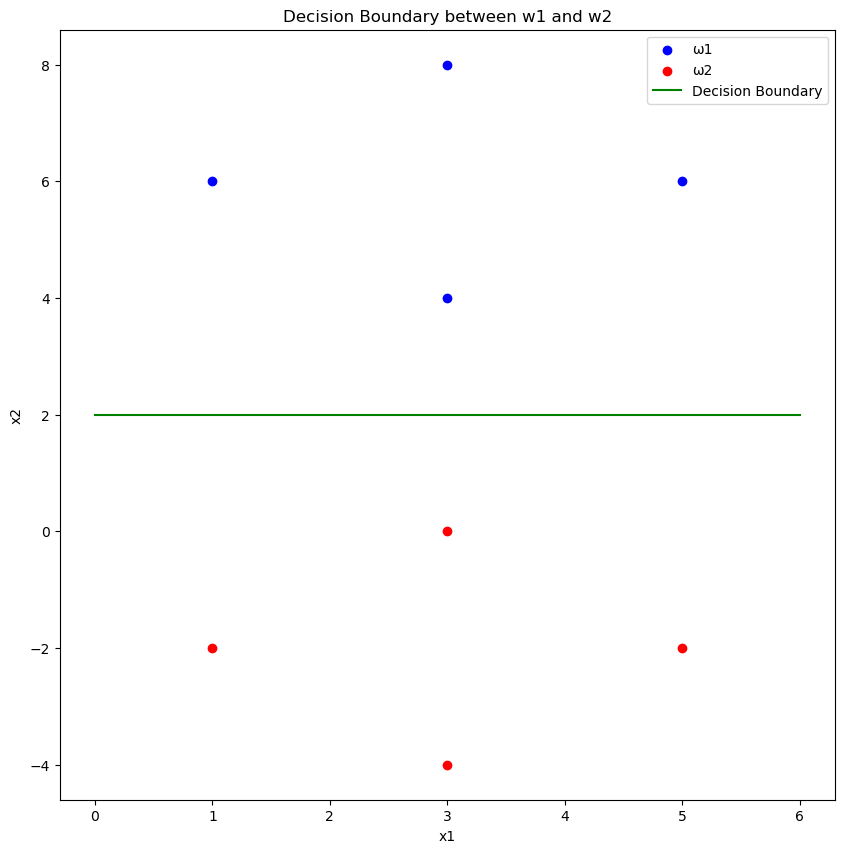

In [3]:

w1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
w2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
pw1 = 0.5
pw2 = 0.5

plt.figure(figsize = (10, 10))
plt.scatter(w1[:, 0], w1[:, 1], color='blue', label='ω1')
plt.scatter(w2[:, 0], w2[:, 1], color='red', label='ω2')


result = bayes_classifier(w1, w2, pw1, pw2)
#If case 1 or 2
if isinstance(result, tuple) and len(result) == 2:
    x_values, y_values = result
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')

# If case 3 using contour.
else: 

    xx, yy, g1_values, g2_values = result
    plt.contour(xx, yy, g1_values - g2_values, levels=[0], colors='green')


plt.title("Decision Boundary between w1 and w2")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

